In [47]:
import pandas as pd
import numpy as np
abalone = pd.read_csv('C:/Users/132004/Downloads/Jupyter notebooks_class/ML assignments/attachment_Logistic_regression_Assignment/Logistic regression Assignment/abalone.csv')

In [48]:
abalone.columns = ['Sex','Length',"Diameter",'Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [4]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
abalone['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [6]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


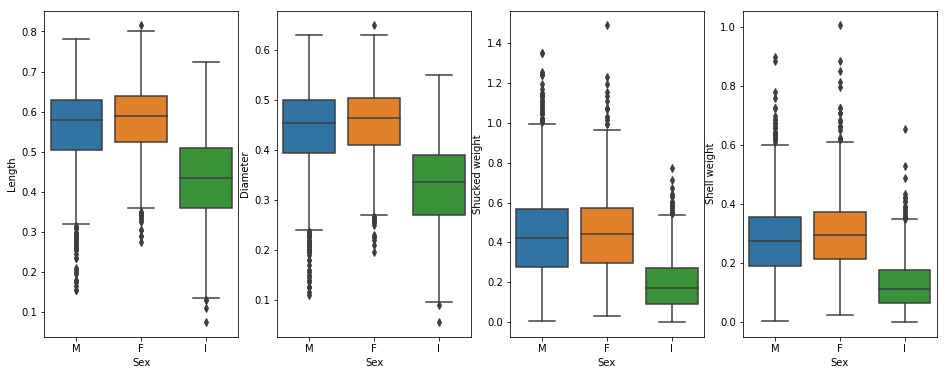

In [7]:
#Fixed the attribute name error(space prob) by abalone.columns = ['Sex','Length',"Diameter",'Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
features = ['Length',"Diameter",'Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 10
feature1 = ['Length',"Diameter",'Shucked weight','Shell weight']
fig, axs = plt.subplots(1, len(feature1))
for index,feature_y in enumerate(feature1):
    sns.boxplot(x='Sex',y=feature_y,data=abalone,ax=axs[index])

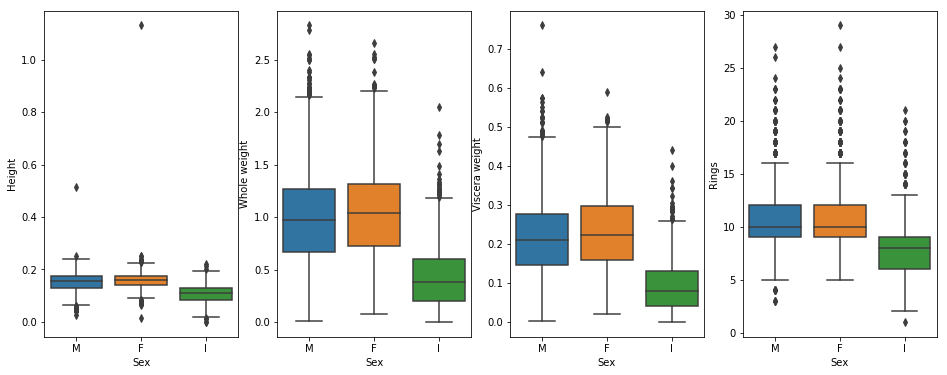

In [8]:
features2 = ['Height','Whole weight','Viscera weight','Rings']
fig, axs = plt.subplots(1,len(features2))
for index,feature_y in enumerate(features2):
    sns.boxplot(x='Sex',y=feature_y,data=abalone,ax=axs[index])

IQR for all the attributes is almost similar for Male and Female.So,there is no parameter that can differentiate significantly b/w M & F
Shucked weight or Viscera weight would be the good choice for classification for "Infants".

In [49]:
abalone['Sex'] = abalone['Sex'].map({'M':0,'F':1,'I':2})
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [41]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null int64
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


# Predictive Analysis

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.cross_validation import train_test_split

features=['Length',"Diameter",'Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
X = abalone[(features)].values
y = abalone['Sex'].values
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=98)

In [74]:
#Feature scaling and Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.538277511962
[[197 150 128]
 [165 145  76]
 [ 34  26 333]]
             precision    recall  f1-score   support

          0       0.50      0.41      0.45       475
          1       0.45      0.38      0.41       386
          2       0.62      0.85      0.72       393

avg / total       0.52      0.54      0.52      1254



### Decision Tree

In [54]:
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
my_tree_one.fit(X_train,y_train)
y_pred = my_tree_one.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.548644338118
[[281 119  75]
 [225 122  39]
 [ 74  34 285]]
             precision    recall  f1-score   support

          0       0.48      0.59      0.53       475
          1       0.44      0.32      0.37       386
          2       0.71      0.73      0.72       393

avg / total       0.54      0.55      0.54      1254



In [55]:
print(my_tree_one.feature_importances_)

[ 0.01242354  0.0072328   0.00970512  0.10422596  0.01046042  0.67927242
  0.00707079  0.16960895]


### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Building and fitting my_forest
forest = RandomForestClassifier(criterion='entropy',max_depth = 4, n_estimators = 10, random_state = 1)
my_forest = forest.fit(X_train, y_train)

# Print the score of the fitted random forest
pred = forest.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.532695374801
[[204 154 117]
 [177 142  67]
 [ 48  23 322]]
             precision    recall  f1-score   support

          0       0.48      0.43      0.45       475
          1       0.45      0.37      0.40       386
          2       0.64      0.82      0.72       393

avg / total       0.52      0.53      0.52      1254



In [68]:
pred_proba = logreg.predict_proba(X_test)

In [69]:
pred_proba

array([[ 0.53075322,  0.44372798,  0.0255188 ],
       [ 0.34575081,  0.3269201 ,  0.32732909],
       [ 0.49241904,  0.4254576 ,  0.08212337],
       ..., 
       [ 0.49698889,  0.39399718,  0.10901392],
       [ 0.26094228,  0.2569571 ,  0.48210062],
       [ 0.41116106,  0.552297  ,  0.03654194]])

In [59]:
#print(metrics.accuracy_score(y,pred))
pred_proba[:,2]          #prob of sex being I

array([ 0.02018561,  0.33517693,  0.25408615, ...,  0.16954614,
        0.41953152,  0.2035645 ])

# Grid Search Cross Validation

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
params={"C":[0.001,0.01,0.1,1,10,100,1000,10000],"penalty":['l1','l2'],"max_iter":[50,100,150,200]}

In [84]:
grid = GridSearchCV(logreg,params,cv=10)

In [85]:
grid_log = grid.fit(X_train,y_train)

In [86]:
grid_log.best_params_

{'C': 0.01, 'max_iter': 150, 'penalty': 'l1'}

In [87]:
y_pred = grid_log.predict(X_test)

In [88]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.545454545455
[[255  82 138]
 [212  91  83]
 [ 42  13 338]]
             precision    recall  f1-score   support

          0       0.50      0.54      0.52       475
          1       0.49      0.24      0.32       386
          2       0.60      0.86      0.71       393

avg / total       0.53      0.55      0.52      1254

